# Unit12 Case Study: Neural Net<a name="Top"></a>

<span style="color:black; font-size: 1.3em;">MSDS7333-4023

<span style="color:black; font-size: 1.3em;">8/6/2018

<span style="color:black; font-size: 1.3em;">Mooyoung Lee

# Assignment: 

<span style="color:black; font-size: 1.3em;"> Take a subset of the data and run the neural net presented in class:

<span style="color:black; font-size: 1.3em;"> N can be any number greater than 1 million, but less than 10.5 million (8GB Ram recommended for all the data).


# Objective: 

<span style="color:black; font-size: 1.3em;"> Learning how to construct neural network model using keras.  It is assumed to use only **deep feed forward architecture** since the model score has to be compared by adding layers and neurons.  See below image for the layout of deep feed forward model.


<span style="color:black; font-size: 1.3em;"> Learning the effect of **architecture, activation functions, batch size, kernel initializers, optimizers** to the model score.

<span style="color:black; font-size: 1.3em;">  Generating a model that gives the best model score.  



<img src="neuralnetworks.png" alt="Drawing" style="width: 700px;"/>
source: (https://www.asimovinstitute.org/neural-network-zoo/)

# Method/Result: <a name="result"></a>


<span style="color:black; font-size: 1.3em;"> **Dataset**:  A minimum requied amount (1-million samples) of dataset is selected to train, and 500,000 samples were selected to test.  Samples are not selected randomly.  It may be a good idea to select samples randomly for the final model.  

<span style="color:black; font-size: 1.3em;"> **Model score** is measured by the Area Under the Receiver Operating Characteristic Curve (ROC_AUC), which is given by this assignment. ROC curve shows the relation between true positive rate(TPR) and the false positive rate(FPR) in 2-D plot.  The areas under the curve indicate the chance of correctly classify items with only regard to TPR and FPR.

<span style="color:black; font-size: 1.3em;"> **Data scaling** to [0,1] range is not applied to our dataset.  Somehow the neural network models that I tried showed slightly less score with the scaling.  However, it is known to use scaling for better result in neural network models.  

<span style="color:black; font-size: 1.3em;"> **Modeling procedures** were given as below.

### 1.	Pick 3 or more different architectures (add/subtract layers+neurons) and run the model + score. 

<span style="color:blue; font-size: 1.3em;"> Architecutres with different dense layers with 56-neuron is test first.  The layer number was changed from 1 to 4. The ROC_AUC value kept decreasing when the dense layer increase from 1 to 4.  The best ROC_AUC socre with one dense layer was 0.725. [Code](#1)

<span style="color:blue; font-size: 1.3em;">  With the above one dense layer which showed the best score, the number of neuron on the dense layer changed with following values:  [14, 28, 42, 56, 70, 84].  28-neuron showed the highest ROC_AUC score as 0.725.  The **maximum difference in ROC_AUC** value with all neuron configurations was **0.008**.  **There was not much difference in ROC_AUUC with different neuron values.**  [Code](#1b)

### 2.	With those same 3 architectures, run the SAME architecture but with 2 different (from sigmoid) activation functions.  Google the Keras documentation for a look at different available activations. 

<span style="color:blue; font-size: 1.3em;"> 'sigmoid','softmax','relu', and 'tanh' activation functions are tried on 3 models.  The difference among models were the number of layers.  All layers used 28-neurons.  Again the model with only one layer with 28-neuron and with 'sigmoid' showed the highest ROC_AUC score, 0.723.  As the number of layer increases and when other activation functions are used besides 'sigmoid', the **ROC_AUC scores all went down to 0.5**.  This may be the result of **vanishing and exploding gradients** due to the nature of activation functions.  **LeakyReLU** with alpha value of 0.3 is tried to see if it solves the vanishing gradient problem but the ROC_AUC score with LeakyReLU was 0.47. [Code](#2)

### 3.	Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude
<span style="color:blue; font-size: 1.3em;">  The best model at this point was one dense layer with 28-neurons and sigmoid activation function.  Batch sizes were changed with following values: [100, 10000, 1000000].  As the **batch size incrased** by the 2 orders of magnitude, the **ROC_AUC scores dropped** by more than 0.1 each time.  Thus, the batch size of 100 showed the best ROC_AUC score, 0.77. [Code](#3)

### 4.	Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.
<span style="color:blue; font-size: 1.3em;">  Following kernel initializers are tried: ['Zeros','random_uniform','lecun_normal','lecun_uniform','he_uniform','he_normal','VarianceScaling'].

<span style="color:blue; font-size: 1.3em;"> **'he_normal'** initializer provided the best model score, 0.73.  However, **the variation in ROC_AUC score with different kernel initializers was not exceeding 0.01.** [Code](#4)

### 5.	Take your best results from #3 and try 3 different optimizers. (LMGTFY)
<span style="color:blue; font-size: 1.3em;"> **'SGD', 'RMSprop', 'Adam', and 'Adamax' optimizers** are tried. All hyperparameters for the optimizers are set to default.  **Adam optimizer showed the highest score**, 0.71. **Adam optimizer seems to learn fater than other optimizer.** The lowest model score, 0.58, was observed with sgd optimizer. Noticed that the learning rate for the sgd optimizer that has been used for previous steps was 0.1 which is faster than the default learning rate 0.01.  If the learning iteration, epochs, increases the ROC_AUC score with sgd optimizer  will go back to 0.73 which is observed from previous step with a learning rate of 0.1. [Code](#5)

### 6.	Take all that you’ve learned so far and give your best shot at producing a score. 
[Code](#6)
#### Trial 1 -  Combination of parameters found above steps : <span style="color:blue">ROC AUC =  0.75 
    - num_neuron = 28
    - activation = 'sigmoid'
    - num_batch = 100
    - kern_init = 'he_normal'
    - Optimizer = Adam()

#### Trial 2 - Add an extra layer with different neuron amount and by mixing activation functions : <span style="color:blue">ROC AUC =  0.78
    - the activation function for the 28-neuron layer is changed to relu
    - added 14-neuron layer with relu activation function
    
#### Trial 3 - Add more Epoch interations : <span style="color:blue">ROC AUC =  0.80
    - the epoch number is increased to 30.

# Questions to be  answered (These are loaded questions—be warned they are there to test your understanding):

## Q1: What was the effect of adding more layers/neurons.

<span style="color:blue; font-size: 1.3em;"> With this specific dataset and feed forward neural network architecture, the model score, ROC_AUC, dropped to 0.5 or below when the number of dense layer increased from 1 to 4.  When the ROC_AUC value go below 0.5, the model become useless since the probability with guessing is 0.5.  The models failed to converge.  The possible reason for this is that the activation functions are killing the neurons by vanishing or exploding the gradients.  In other words, the weigths of neuron stuck into 0 or 1 so that it fails to converge.  Choosing right activation functions for right layer seems important.  Using relu function for the dense layers and sigmoid fuction for the last layer worked from the above #6 Trial 2 and 3 and yielded the best score.

<span style="color:blue; font-size: 1.3em;"> Chaning neurons from 14 to 84 in a dense layer was not affecting the model score much (max difference was 0.008).  The highest model score was came from 28-neurons so the larger the neuron number was not necessarily increase the model score in this case.  

## Q2: Which parameters gave you the best result and why (in your opinion) did they 

<span style="color:blue; font-size: 1.3em;"> The parameters that influence the ROC_AUC score to this case was the batch size and selecting right activation function.  The ROC_AUC score decreased by more than 0.1 as the batch size increased from 100 to 10,000 and 1,000,000.  Selecting right activation seems importance since some activation function just kills the neurons and result model score of 0.5 which is a failure.  

<span style="color:black; font-size: 1.3em;"> It seems like the combination of the number of layers and the activation functions are important since the model just not working with wrong combinations.  

<span style="color:black; font-size: 1.3em;"> Kernel initializers and the number of neuron were the least influential parameters for the model score from this case.  

<span style="color:black; font-size: 1.3em;"> Optimizer showed some differences. However, with different epoch number or learning rate, it seems like similar model scores can be achieved. 

## Q3: For #6, how did you decide that your model was ‘done’

<span style="color:blue; font-size: 1.3em;"> My modeling process was done when there was good amount of materials are generated to submit this assignment. 

<span style="color:blue; font-size: 1.3em;"> At work modeling process will be done when target specifications for a model is acheived or a deadline is passed since there is a limited amount of budget for each project.

<span style="color:blue; font-size: 1.3em;"> If there is no limitations and still the model target specifications are not met, then one should keep try different architectures. If the model score is not increasing for a certain amount of iterations with all different methods/architectures, then one may settle to stop.

# Code Reference :

# Load data

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from matplotlib import interactive
interactive(True)
import matplotlib.pyplot as plt


N = 1000000. #Change this line adjust the number of rows.                     # select between 1 to 10.5 million samples
data=pd.read_csv("HIGGS.csv",nrows=N,header=None)
test_data=pd.read_csv("HIGGS.csv",nrows=500000,header=None,skiprows=int(N))   # use 500,000 samples for testing

# Drop NaN
print('Length data before dropna :', len(data))
data.dropna(axis=0, inplace=True)
print('Length data after dropna :', len(data))

print('Length test_data before dropna :', len(test_data))
test_data.dropna(axis=0, inplace=True)
print('Length test_data after dropna :', len(test_data))

# test/train data split
y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

# scale data into [0,1] scale;  Examine outliers for future fine tuning!
# This scale was not helping to increase ROC_AUC
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(x)
# X_test_minmax = min_max_scaler.transform(x_test)

Using TensorFlow backend.


Length data before dropna : 1000000
Length data after dropna : 1000000
Length test_data before dropna : 500000
Length test_data after dropna : 500000


In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.529673,0.991592,0.000489,-0.000953,0.998150,-0.000573,0.990564,-0.000824,0.000549,1.000192,...,-0.000375,-0.001725,0.998231,1.034291,1.024907,1.050530,1.009863,0.973220,1.033352,0.959872
std,0.499119,0.565099,1.008276,1.005810,0.599151,1.006808,0.475070,1.010368,1.006224,1.027716,...,1.007789,1.005672,1.399478,0.672083,0.379824,0.164366,0.397802,0.525251,0.365039,0.313194
min,0.000000,0.274697,-2.434976,-1.742508,0.000626,-1.743944,0.138602,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.101168,0.234753,0.092202,0.157473,0.048125,0.303350,0.350939
25%,0.000000,0.590753,-0.737349,-0.871931,0.576455,-0.871791,0.678535,-0.689225,-0.867542,0.000000,...,-0.714190,-0.872034,0.000000,0.790729,0.846332,0.985750,0.767338,0.673858,0.819379,0.770333
50%,1.000000,0.853737,0.000920,0.000417,0.891644,-0.000800,0.894178,-0.001016,0.000715,1.086538,...,0.000372,-0.005259,0.000000,0.894967,0.950568,0.989771,0.916455,0.873490,0.947443,0.871788
75%,1.000000,1.236958,0.738214,0.868775,1.293112,0.871773,1.170649,0.687194,0.869976,2.173076,...,0.714934,0.868831,3.101961,1.024375,1.083443,1.020216,1.142236,1.139482,1.140750,1.059245
max,1.000000,8.711782,2.434868,1.743236,9.900929,1.743257,8.382610,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,31.076191,15.637859,5.921233,10.794087,13.735691,8.779915,6.259156


# 1a. Changes in the number of layers <a name="1"></a>

[Back to result](#result)

## Model A

In [4]:
%%time

model = Sequential()
model.add(Dense(56, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='uniform')) 
model.add(Activation('sigmoid'))


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
print('ROC AUC = ', roc_auc_score(y_test,model.predict(x_test)))                # Area Under the ROC curve

Epoch 1/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6639 - acc: 0.5909
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6439 - acc: 0.6225
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6342 - acc: 0.6368
Epoch 4/5
1000000/1000000 [==============================] - 5s 5us/step - loss: 0.6286 - acc: 0.6438
Epoch 5/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6232 - acc: 0.6508
ROC AUC =  0.7255170314242795
Wall time: 42.2 s


## Model B

In [5]:
%%time

model = Sequential()
model.add(Dense(56, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='uniform')) 
model.add(Activation('sigmoid'))


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
print('ROC AUC = ', roc_auc_score(y_test,model.predict(x_test)))                # Area Under the ROC curve

Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6919 - acc: 0.5278
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6919 - acc: 0.5280
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6916 - acc: 0.5287
Epoch 4/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6766 - acc: 0.5671
Epoch 5/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6531 - acc: 0.6100
ROC AUC =  0.6669119639528553
Wall time: 45.3 s


## Model C

In [6]:
%%time

model = Sequential()
model.add(Dense(56, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='uniform')) 
model.add(Activation('sigmoid'))


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
print('ROC AUC = ', roc_auc_score(y_test,model.predict(x_test)))                # Area Under the ROC curve

Epoch 1/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6920 - acc: 0.5279
Epoch 2/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6918 - acc: 0.5282
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6918 - acc: 0.5289
Epoch 4/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6917 - acc: 0.5289
Epoch 5/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6917 - acc: 0.5289
ROC AUC =  0.4900005665301096
Wall time: 53.4 s


## Model D

In [7]:
%%time

model = Sequential()
model.add(Dense(56, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(56, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='uniform')) 
model.add(Activation('sigmoid'))


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
print('ROC AUC = ', roc_auc_score(y_test,model.predict(x_test)))                # Area Under the ROC curve

Epoch 1/5
1000000/1000000 [==============================] - 9s 9us/step - loss: 0.6919 - acc: 0.5277
Epoch 2/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6918 - acc: 0.5283
Epoch 3/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6918 - acc: 0.5287
Epoch 4/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6918 - acc: 0.5291
Epoch 5/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6917 - acc: 0.5291
ROC AUC =  0.49209677653829714
Wall time: 59.1 s


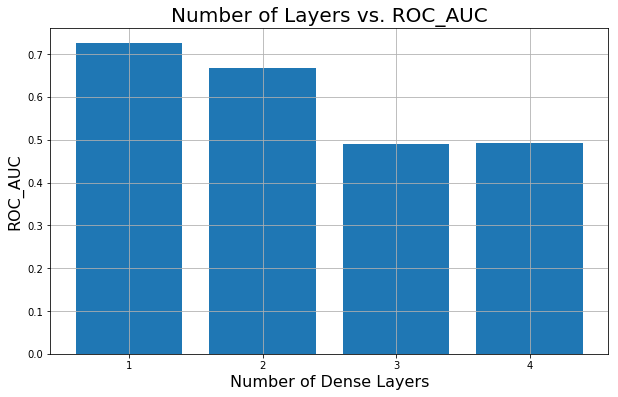

In [32]:
score_layer = pd.DataFrame({'num_layer': [1,2,3,4], 
                            'ROC_AUC':[0.7255170314242795, 0.6669119639528553, 0.4900005665301096, 0.49209677653829714]})

plt.bar(score_layer['num_layer'], score_layer['ROC_AUC'])
plt.xlabel('Number of Dense Layers',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Number of Layers vs. ROC_AUC',fontsize=20)
plt.xticks(score_layer['num_layer'])
plt.grid(True)

# 1b. Change in number of neurons <a name="1b"></a>

[Back to result](#result)

In [36]:
def RocAuc_N(num_neuron):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer='uniform')) 
    model.add(Activation('sigmoid'))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))                            # Area Under the ROC curve
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Number of Neurons =  14
Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6649 - acc: 0.5881
Epoch 2/5
1000000/1000000 [==============================] - 5s 5us/step - loss: 0.6417 - acc: 0.6232
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6342 - acc: 0.6356
Epoch 4/5
1000000/1000000 [==============================] - 5s 5us/step - loss: 0.6295 - acc: 0.6409
Epoch 5/5
1000000/1000000 [==============================] - 5s 5us/step - loss: 0.6253 - acc: 0.6471
ROC AUC =  0.7238469128920331

Number of Neurons =  28
Epoch 1/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6659 - acc: 0.5872
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6445 - acc: 0.6207
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6347 - acc: 0.6358
Epoch 4/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6279 - acc: 0.6451
Ep

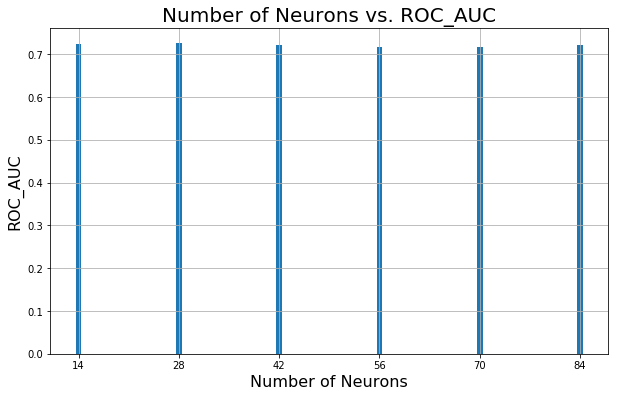

In [38]:
# ROC_AUC w/ neuron numbers
result =[]
for i in [14, 28, 42, 56, 70, 84]:
    print('\nNumber of Neurons = ',i)
    auc = RocAuc_N(i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(score.iloc[:,0],score.iloc[:,1])
plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Number of Neurons vs. ROC_AUC',fontsize=20)
plt.xticks(score.iloc[:,0])
plt.grid(True)

# 28-neuron was the best.  The number of neuron with one dense layer was not affecting the ROC AUC value much.

# Activation functions ('sigmoid','softmax','relu','tanh') vs. ROC.AUC<a name="2"></a>

[Back to top](#result)

In [39]:
def RocAuc_N_A(num_neuron, activation):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer='uniform')) 
    model.add(Activation(activation))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))                            # Area Under the ROC curve
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Activation Function =  sigmoid
Epoch 1/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6651 - acc: 0.5882
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6427 - acc: 0.6240
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6339 - acc: 0.6372
Epoch 4/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6284 - acc: 0.6439
Epoch 5/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6243 - acc: 0.6496
ROC AUC =  0.723919998542564

Activation Function =  softmax
Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 7.4981 - acc: 0.5297
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4981 - acc: 0.5297
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4981 - acc: 0.5297
Epoch 4/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 7.4981 - a

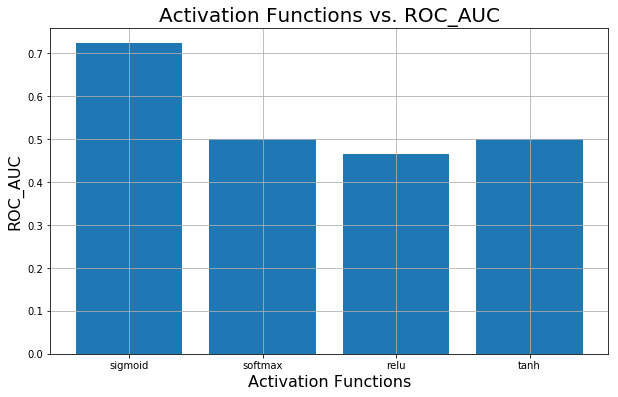

In [45]:
# Activation fnc vs. ROC_AUC
result =[]
for i in ['sigmoid','softmax','relu','tanh']:
    print('\nActivation Function = ',i)
    auc = RocAuc_N_A(28, i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(score.iloc[:,0],score.iloc[:,1])
plt.xlabel('Activation Functions',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Activation Functions vs. ROC_AUC',fontsize=20)
plt.grid(True)

## All three activation functions besides sigmoid were failed because ROC_AUC value below 0.5 is same as guessing.  LeakyReLU is tested below to see if that changes but the output was similar to relu. 

In [46]:
from keras.layers.advanced_activations import LeakyReLU
RocAuc_N_A(56, LeakyReLU())

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\keras\activations.py:186: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 7.4942 - acc: 4.7900e-04
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4982 - acc: 0.0000e+00
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4982 - acc: 0.0000e+00
Epoch 4/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4981 - acc: 0.0000e+00A: 
Epoch 5/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 7.4981 - acc: 0.0000e+00
ROC AUC =  0.47328604318793904


0.47328604318793904

# Activation functions to a model with TWO 28-neuron layers

In [90]:
def RocAuc_N_A2(num_neuron, activation):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(num_neuron, kernel_initializer='uniform'))       
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer='uniform')) 
    model.add(Activation(activation))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))                            # Area Under the ROC curve
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Activation Function =  sigmoid
Epoch 1/5
1000000/1000000 [==============================] - 15s 15us/step - loss: 0.6917 - acc: 0.5289
Epoch 2/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6917 - acc: 0.5295
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6916 - acc: 0.5294A: 0s - loss: 0.6916 - acc
Epoch 4/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6917 - acc: 0.5293
Epoch 5/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6915 - acc: 0.5295
ROC AUC =  0.5897614942106243

Activation Function =  softmax
Epoch 1/5
1000000/1000000 [==============================] - 9s 9us/step - loss: 7.4981 - acc: 0.5297
Epoch 2/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 7.4981 - acc: 0.5297
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 7.4981 - acc: 0.5297
Epoch 4/5
1000000/1000000 [==============================] - 7

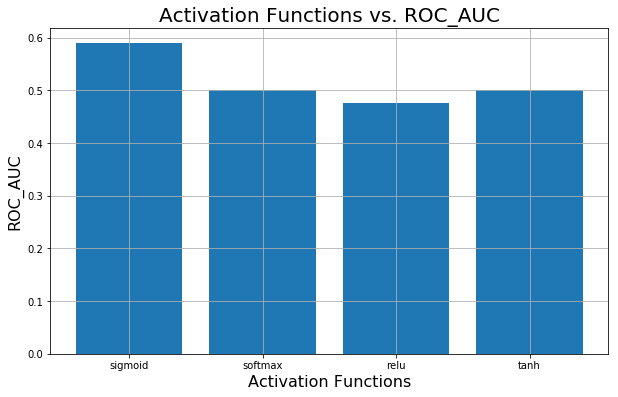

In [91]:
# Activation fnc vs. ROC_AUC
result =[]
for i in ['sigmoid','softmax','relu','tanh']:
    print('\nActivation Function = ',i)
    auc = RocAuc_N_A2(28, i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(score.iloc[:,0],score.iloc[:,1])
plt.xlabel('Activation Functions',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Activation Functions vs. ROC_AUC',fontsize=20)
plt.grid(True)

# Activation functions to a model with THREE 28-neuron layers

In [92]:
def RocAuc_N_A3(num_neuron, activation):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(num_neuron, kernel_initializer='uniform'))       
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(num_neuron, kernel_initializer='uniform'))       
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer='uniform')) 
    model.add(Activation(activation))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size=1000)                                      # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))                            # Area Under the ROC curve
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Activation Function =  sigmoid
Epoch 1/5
1000000/1000000 [==============================] - 10s 10us/step - loss: 0.6917 - acc: 0.5291
Epoch 2/5
1000000/1000000 [==============================] - 9s 9us/step - loss: 0.6917 - acc: 0.5293
Epoch 3/5
1000000/1000000 [==============================] - 10s 10us/step - loss: 0.6917 - acc: 0.5295
Epoch 4/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.6917 - acc: 0.5296
Epoch 5/5
1000000/1000000 [==============================] - 9s 9us/step - loss: 0.6916 - acc: 0.5296
ROC AUC =  0.48912809141366326

Activation Function =  softmax
Epoch 1/5
1000000/1000000 [==============================] - 10s 10us/step - loss: 7.4981 - acc: 0.5297
Epoch 2/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 7.4981 - acc: 0.5297
Epoch 3/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 7.4981 - acc: 0.5297
Epoch 4/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 7.

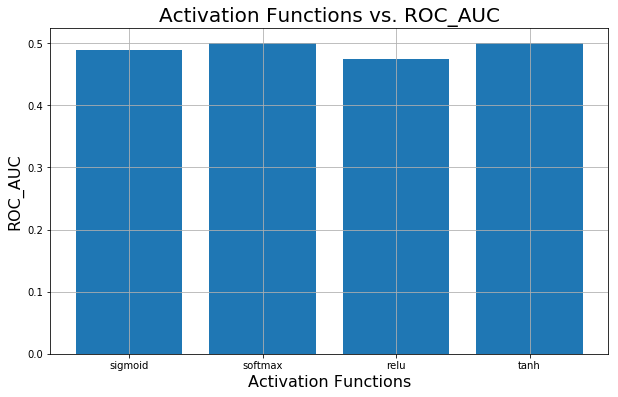

In [93]:
# Activation fnc vs. ROC_AUC
result =[]
for i in ['sigmoid','softmax','relu','tanh']:
    print('\nActivation Function = ',i)
    auc = RocAuc_N_A3(28, i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(score.iloc[:,0],score.iloc[:,1])
plt.xlabel('Activation Functions',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Activation Functions vs. ROC_AUC',fontsize=20)
plt.grid(True)

# 3. Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude <a name="3"></a>

[Back to top](#result)

In [57]:
def RocAuc_N_A_B(num_neuron, activation, num_batch):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer='uniform'))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer='uniform')) 
    model.add(Activation(activation))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size = num_batch)                               # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Batch size =  100
Epoch 1/5
1000000/1000000 [==============================] - 41s 41us/step - loss: 0.6288 - acc: 0.6419
Epoch 2/5
1000000/1000000 [==============================] - 46s 46us/step - loss: 0.6048 - acc: 0.6726
Epoch 3/5
1000000/1000000 [==============================] - 46s 46us/step - loss: 0.5973 - acc: 0.6792
Epoch 4/5
1000000/1000000 [==============================] - 46s 46us/step - loss: 0.5910 - acc: 0.6859
Epoch 5/5
1000000/1000000 [==============================] - 46s 46us/step - loss: 0.5870 - acc: 0.6896
ROC AUC =  0.7731398407638762

Batch size =  10000
Epoch 1/5
1000000/1000000 [==============================] - 2s 2us/step - loss: 0.6907 - acc: 0.5300
Epoch 2/5
1000000/1000000 [==============================] - 2s 2us/step - loss: 0.6857 - acc: 0.5528
Epoch 3/5
1000000/1000000 [==============================] - 2s 2us/step - loss: 0.6742 - acc: 0.5790
Epoch 4/5
1000000/1000000 [==============================] - 2s 2us/step - loss: 0.6647 - acc: 0.5925
Ep

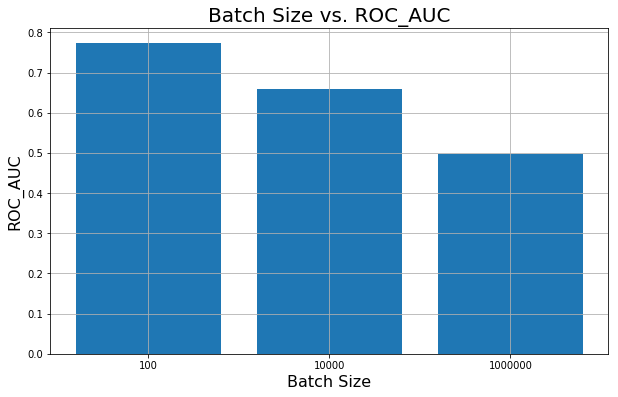

In [58]:
result =[]
for i in [100, 10000, 1000000]:
    print('\nBatch size = ',i)
    auc = RocAuc_N_A_B(28, 'sigmoid', i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(list(map(str, score.iloc[:,0])),score.iloc[:,1])
plt.xlabel('Batch Size',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Batch Size vs. ROC_AUC',fontsize=20)
plt.grid(True)

# 4.	Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.  <a name="4"></a>

[Back to top](#result)

In [59]:
def RocAuc_N_A_B_K(num_neuron, activation, num_batch, kern_init):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer= kern_init))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer = kern_init)) 
    model.add(Activation(activation))


    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)                      # Stochastic gradient descent optimizer
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size = num_batch)                               # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Kernel Initializer =  Zeros
Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6671 - acc: 0.5844
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6458 - acc: 0.6193
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6359 - acc: 0.6327
Epoch 4/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6297 - acc: 0.6409
Epoch 5/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6248 - acc: 0.6477
ROC AUC =  0.7215615747949597

Kernel Initializer =  random_uniform
Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6647 - acc: 0.5892
Epoch 2/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6442 - acc: 0.6220
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6334 - acc: 0.6368
Epoch 4/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6264

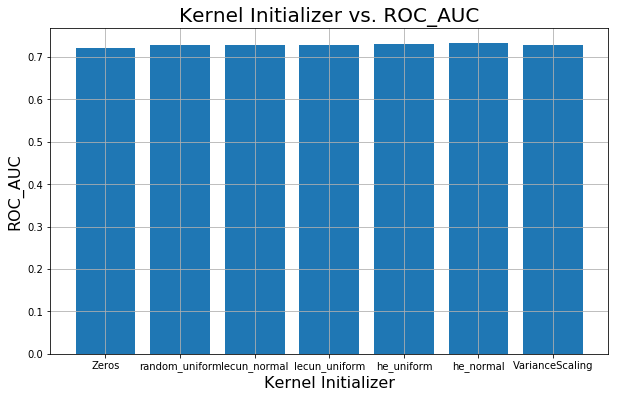

In [61]:
result =[]
for i in ['Zeros','random_uniform', 'lecun_normal','lecun_uniform','he_uniform','he_normal','VarianceScaling']:
    print('\nKernel Initializer = ',i)
    auc = RocAuc_N_A_B_K(28, 'sigmoid', 1000, i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(score.iloc[:,0],score.iloc[:,1])
plt.xlabel('Kernel Initializer',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Kernel Initializer vs. ROC_AUC',fontsize=20)
plt.grid(True)

# 5.Take your best results from #3 and try 3 different optimizers. (LMGTFY) <a name="5"></a>

[Back to top](#result)

In [68]:
def RocAuc_N_A_B_K_O(num_neuron, activation, num_batch, kern_init, Optimizer):
    model = Sequential()
    model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer= kern_init))        # X_train.shape[1] == 28 here
    model.add(Activation(activation))
    model.add(Dropout(0.10))
    model.add(Dense(1, kernel_initializer = kern_init)) 
    model.add(Activation(activation))

    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Optimizer)  # Configures the model for training

    model.fit(x, y, epochs=5, batch_size = num_batch)                               # Train model
    rocAuc = roc_auc_score(y_test,model.predict(x_test))
    print('ROC AUC = ', rocAuc) 
    return rocAuc


Optimizer =  <keras.optimizers.SGD object at 0x000002155BE89240>
Epoch 1/5
1000000/1000000 [==============================] - 8s 8us/step - loss: 0.7100 - acc: 0.5127
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6949 - acc: 0.5256
Epoch 3/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6911 - acc: 0.5346
Epoch 4/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6887 - acc: 0.5422
Epoch 5/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6870 - acc: 0.5478
ROC AUC =  0.5876959609599752

Optimizer =  <keras.optimizers.RMSprop object at 0x000002155BE89278>
Epoch 1/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6682 - acc: 0.5855
Epoch 2/5
1000000/1000000 [==============================] - 6s 6us/step - loss: 0.6499 - acc: 0.6158
Epoch 3/5
1000000/1000000 [==============================] - 7s 7us/step - loss: 0.6423 - acc: 0.6272
Epoch 4/5
1000000/

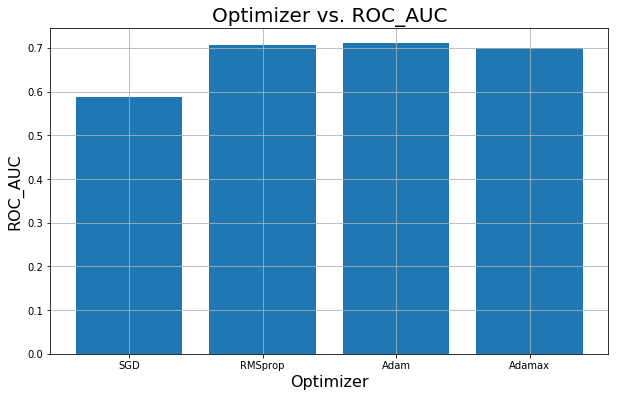

In [77]:
from keras.optimizers import SGD, RMSprop, Adam, Adamax
result =[]
for i in [SGD(), RMSprop(), Adam(), Adamax() ]:
    print('\nOptimizer = ',i)
    auc = RocAuc_N_A_B_K_O(28, 'sigmoid', 1000, 'he_normal', i)
    result.append((i, auc))

score = pd.DataFrame(result)
plt.bar(('SGD', 'RMSprop', 'Adam', 'Adamax'),score.iloc[:,1])
plt.xlabel('Optimizer',fontsize=16)
plt.ylabel('ROC_AUC',fontsize=16)
plt.title('Optimizer vs. ROC_AUC',fontsize=20)
plt.grid(True)

# 6.	Take all that you’ve learned so far and give your best shot at producing a score.  <a name="6"></a>

[Back to top](#result)



## Trial 1 -  Combination of parameters found above steps

In [78]:
num_neuron = 28
activation = 'sigmoid'
num_batch = 100
kern_init = 'he_normal'
Optimizer = Adam()

model = Sequential()
model.add(Dense(num_neuron, input_dim= x.shape[1], kernel_initializer= kern_init))    # X_train.shape[1] == 28 here
model.add(Activation(activation))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer = kern_init)) 
model.add(Activation(activation))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Optimizer)  # Configures the model for training

model.fit(x, y, epochs=5, batch_size = num_batch)                                     # Train model
rocAuc = roc_auc_score(y_test,model.predict(x_test))
print('ROC AUC = ', rocAuc) 

Epoch 1/5
1000000/1000000 [==============================] - 49s 49us/step - loss: 0.6462 - acc: 0.6203
Epoch 2/5
1000000/1000000 [==============================] - 53s 53us/step - loss: 0.6228 - acc: 0.6524
Epoch 3/5
1000000/1000000 [==============================] - 54s 54us/step - loss: 0.6130 - acc: 0.6638
Epoch 4/5
1000000/1000000 [==============================] - 54s 54us/step - loss: 0.6075 - acc: 0.6697
Epoch 5/5
1000000/1000000 [==============================] - 54s 54us/step - loss: 0.6037 - acc: 0.6736
ROC AUC =  0.7526852457794145


## Trial 2 - Add an extra layer with different neuron amount and by mixing activation functions

In [87]:
model = Sequential()
model.add(Dense(28, input_dim= x.shape[1], kernel_initializer='he_normal'))        # X_train.shape[1] == 28 here
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(14, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='he_normal')) 
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')  # Configures the model for training

model.fit(x, y, epochs=5, batch_size = num_batch)                                  # Train model
rocAuc = roc_auc_score(y_test,model.predict(x_test))
print('ROC AUC = ', rocAuc) 

Epoch 1/5
1000000/1000000 [==============================] - 62s 62us/step - loss: 0.6385 - acc: 0.6280
Epoch 2/5
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5976 - acc: 0.6768
Epoch 3/5
1000000/1000000 [==============================] - 62s 62us/step - loss: 0.5828 - acc: 0.6900
Epoch 4/5
1000000/1000000 [==============================] - 62s 62us/step - loss: 0.5757 - acc: 0.6958
Epoch 5/5
1000000/1000000 [==============================] - 62s 62us/step - loss: 0.5712 - acc: 0.6996
ROC AUC =  0.7883951264975837


## Trial 3 - Add more Epoch interations

In [88]:
model = Sequential()
model.add(Dense(28, input_dim= x.shape[1], kernel_initializer='he_normal'))        # X_train.shape[1] == 28 here
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(14, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(1, kernel_initializer='he_normal')) 
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')  # Configures the model for training

model.fit(x, y, epochs=30, batch_size = num_batch)                                 # Train model
rocAuc = roc_auc_score(y_test,model.predict(x_test))
print('ROC AUC = ', rocAuc) 

Epoch 1/30
1000000/1000000 [==============================] - 63s 63us/step - loss: 0.6322 - acc: 0.6375
Epoch 2/30
1000000/1000000 [==============================] - 62s 62us/step - loss: 0.5966 - acc: 0.6791
Epoch 3/30
1000000/1000000 [==============================] - 66s 66us/step - loss: 0.5852 - acc: 0.6899
Epoch 4/30
1000000/1000000 [==============================] - 63s 63us/step - loss: 0.5798 - acc: 0.6944
Epoch 5/30
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5763 - acc: 0.6973
Epoch 6/30
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5739 - acc: 0.6990
Epoch 7/30
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5716 - acc: 0.7009
Epoch 8/30
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5696 - acc: 0.7024
Epoch 9/30
1000000/1000000 [==============================] - 61s 61us/step - loss: 0.5675 - acc: 0.7043
Epoch 10/30
1000000/1000000 [==========================

# Resources:

[Back to top](#result)

## [Activation functions](https://keras.io/activations/)
**from keras.layers import Activation, Dense**

- softmax 
    - Tensor, output of softmax transformation.
- elu (Exponential linear unit)
    - keras.activations.elu(x, alpha=1.0)
    - The exponential linear activation: x if x > 0 and alpha * (exp(x)-1) if x < 0.
- selu (Scaled Exponential Linear Unit)
    - The scaled exponential unit activation: scale * elu(x, alpha).
    - The values of alpha and scale are chosen so that the mean and variance of the inputs are preserved between two consecutive layers
- softplus
    - The softplus activation: log(exp(x) + 1)
- softsign
    - x / (abs(x) + 1)
- relu
    - keras.activations.relu(x, alpha=0.0, max_value=None)
    - The (leaky) rectified linear unit activation: x if x > 0, alpha * x if x < 0. If max_value is defined, the result is truncated to this value.
- tanh
    - Hyperbolic tangent activation function
- sigmoid
    - Sigmoid activation function
- hard_sigmoid
    - Faster to compute than sigmoid activation
    - Hard sigmoid activation:
        - 0 if x < -2.5
        - 1 if x > 2.5
        - 0.2 * x + 0.5 if -2.5 <= x <= 2.5
- linear (Linear (i.e. identity) activation function)


## [Advanced Activation Functions](https://keras.io/layers/advanced-activations/):
**keras.layers.advanced_activations**

- LeakyReLU
    - Same as the above relu output but the default alpha = 0.3
- PReLU (Parametric Rectified Linear Unit)
    - keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
    - It follows: f(x) = alpha * x for x < 0, f(x) = x for x >= 0, where alpha is a learned array with the same shape as x.
- ELU
    - keras.layers.ELU(alpha=1.0)
    - It follows: f(x) =  alpha * (exp(x) - 1.) for x < 0, f(x) = x for x >= 0.
- ThresholdedReLU
    - keras.layers.ThresholdedReLU(theta=1.0)
    - It follows: f(x) = x for x > theta, f(x) = 0 otherwise.
- Softmax
    - keras.layers.Softmax(axis=-1)
    - axis: Integer, axis along which the softmax normalization is applied.
- ReLU (Rectified Linear Unit activation function)
    - keras.layers.ReLU(max_value=None)

## [Optimizer](https://keras.io/optimizers/#usage-of-optimizers)
**from keras import optimizers**

SGD (Stochastic gradient descent optimizer): 
- keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- Includes support for momentum, learning rate decay, and Nesterov momentum.

RMSprop (RMSProp optimizer)
- keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- It is recommended to leave the parameters of this optimizer at their default values (except the learning rate, which can be freely tuned).
- This optimizer is usually a good choice for recurrent neural networks.

Adagrad (Adagrad optimizer)
- keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
- Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.
- It is recommended to leave the parameters of this optimizer at their default values.

Adadelta (Adadelta optimizer)
- keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
- Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, initial learning rate and decay factor can be set, as in most other Keras optimizers.
- It is recommended to leave the parameters of this optimizer at their default values.

Adam (Adam optimizer)
- keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
- [On the Convergence of Adam and Beyond](https://openreview.net/forum?id=ryQu7f-RZ)

Adamax (Adamax optimizer from Adam paper's Section 7)
- keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
- It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper.
- [Adam - A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8)

Nadam (Nesterov Adam optimizer)
- keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
- Much like Adam is essentially RMSprop with momentum, Nadam is Adam RMSprop with Nesterov momentum.
- Default parameters follow those provided in the paper. It is recommended to leave the parameters of this optimizer at their default values.

TFOptimizer (Wrapper class for native TensorFlow optimizers)
- keras.optimizers.TFOptimizer(optimizer)